In [10]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import os

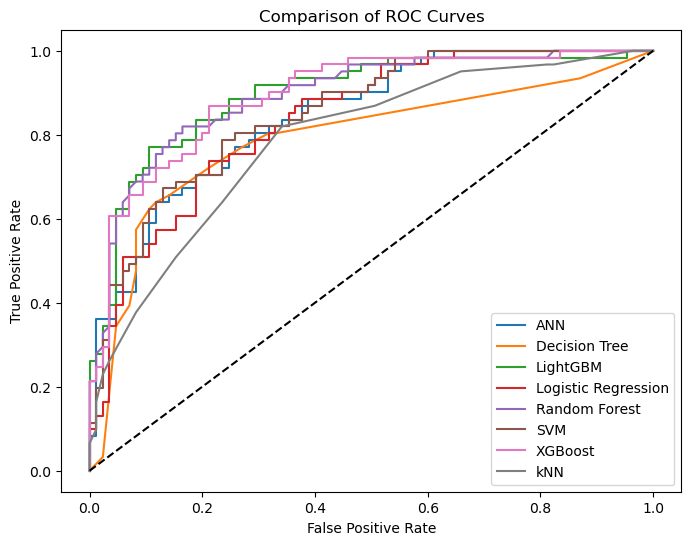

In [6]:
# Find all files matching the pattern 'roc_*.csv'
roc_files = glob.glob('roc/roc_*.csv')
roc_files.sort()  # Sort the files to ensure correct order

# Initialize the plot
plt.figure(figsize=(8, 6))

# Loop over each ROC data file
for file in roc_files:
    # Extract the curve number from the file name
    curve_number = file.split('_')[-1].split('.')[0]  # Extracts the number from 'roc_X.csv'
    
    # Read the ROC data
    roc_data = pd.read_csv(file)
    
    # Check if 'FPR' and 'TPR' columns exist
    if 'FPR' in roc_data.columns and 'TPR' in roc_data.columns:
        # Plot the ROC curve
        plt.plot(roc_data['FPR'], roc_data['TPR'], label=f'{curve_number}')
    else:
        print(f"Warning: {file} does not contain 'FPR' and 'TPR' columns.")
    
# Plot the diagonal line for random guess
plt.plot([0, 1], [0, 1], 'k--')

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC Curves')
plt.legend(loc='lower right')
# plt.grid(True)
plt.show()


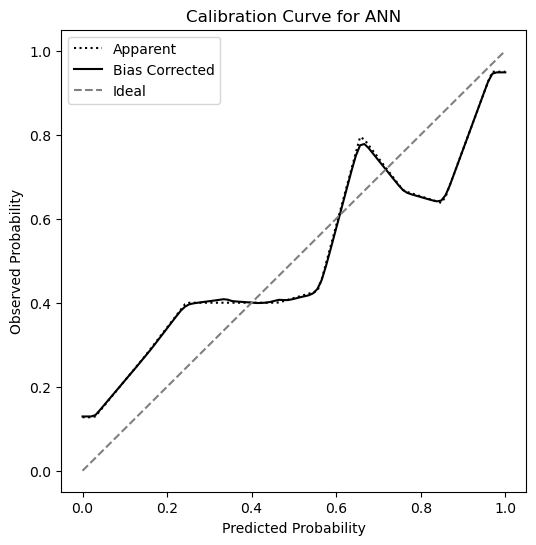

In [30]:
calib_data = pd.read_csv('cali_ann.csv')

# Plot the calibration curve with details
plt.figure(figsize=(6, 6))

# Plot lines
plt.plot(calib_data['Mean_Predicted_Prob'], calib_data['Apparent_Prob'], 
         linestyle=':', color='black', label='Apparent')
plt.plot(calib_data['Mean_Predicted_Prob'], calib_data['Bias_Corrected_Prob'], 
         color='black', label='Bias Corrected')

# Plot the ideal line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Ideal')

# Labels and title
plt.xlabel('Predicted Probability')
plt.ylabel('Observed Probability')
plt.title('Calibration Curve for ANN')
plt.legend()
plt.show()

In [13]:
output_dir = 'calibration_plots/'
os.makedirs(output_dir, exist_ok=True)

# Find all files matching the pattern 'cali_*.csv' in the specified folder
cali_files = glob.glob('cali/cali_*.csv')
cali_files.sort()  # Sort the files to ensure correct order

# Loop over each calibration data file
for file in cali_files:
    # Extract the curve name from the file name
    curve_number = file.split('_')[-1].split('.')[0]  # Extracts the name from 'cali_X.csv'
    
    # Read the calibration data
    cali_data = pd.read_csv(file)
    
    # Check if required columns exist
    if 'Mean_Predicted_Prob' in cali_data.columns and 'Apparent_Prob' in cali_data.columns and 'Bias_Corrected_Prob' in cali_data.columns:
        # Create a new figure for each plot
        plt.figure(figsize=(8, 6))
        
        # Plot the calibration curves
        plt.plot(cali_data['Mean_Predicted_Prob'], cali_data['Apparent_Prob'], 
                linestyle=':', color='black', label='Apparent')
        plt.plot(cali_data['Mean_Predicted_Prob'], cali_data['Bias_Corrected_Prob'], 
                color='black', label='Bias Corrected')
        # Plot the ideal line
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Ideal')
        
        # Customize the plot
        plt.xlabel('Mean Predicted Probability')
        plt.ylabel('Probability')
        plt.title(f'Calibration Curve of {curve_number}')
        plt.legend(loc='lower right')
        
        # Save the plot as a PNG file
        output_file = os.path.join(output_dir, f'cali_{curve_number}.png')
        plt.savefig(output_file)
        
        # Close the plot to free up memory
        plt.close()
        
        print(f"Saved plot for {file} as {output_file}.")
    else:
        print(f"Warning: {file} does not contain required columns.")

Saved plot for cali/cali_ANN.csv as calibration_plots/cali_ANN.png.
Saved plot for cali/cali_Decision Tree.csv as calibration_plots/cali_Decision Tree.png.
Saved plot for cali/cali_LightGBM.csv as calibration_plots/cali_LightGBM.png.
Saved plot for cali/cali_Logistic Regression.csv as calibration_plots/cali_Logistic Regression.png.
Saved plot for cali/cali_Random Forest.csv as calibration_plots/cali_Random Forest.png.
Saved plot for cali/cali_SVM.csv as calibration_plots/cali_SVM.png.
Saved plot for cali/cali_XGBoost.csv as calibration_plots/cali_XGBoost.png.
